## SVM for Nonlinear Data

In this experiment, we will use different types of support vector machines (SVMs) to classify nonlinear data. SVMs are supervised learning algorithms that try to find the optimal hyperplane that maximizes the margin between two classes. SVMs can use different kernel functions to transform the original data into a higher-dimensional space, where the data may become linearly separable.

We will use scikit-learn, a popular machine learning library in Python, to implement different SVMs and compare their performance. We will also use numpy, pandas and matplotlib to handle the data and plot the results.

We will use two synthetic datasets that are not linearly separable: circles and moons. The circles dataset contains two concentric circles with different labels. The moons dataset contains two half-moon shapes with some noise. We will try to use different SVMs to separate the two classes in each dataset.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Generate circle-shaped data
#X, y = make_circles(200, factor=0.3, noise=0.1)

X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

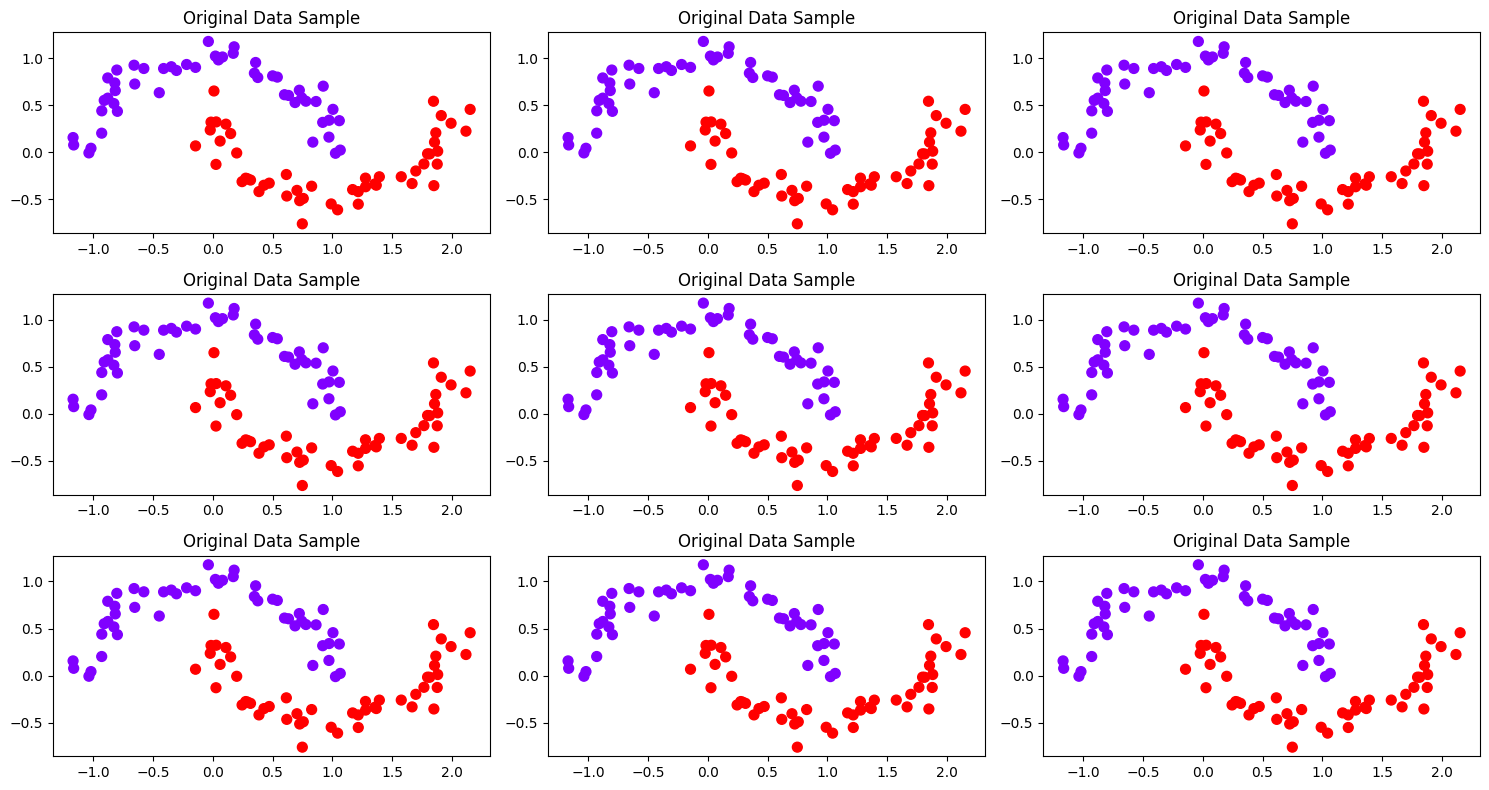

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 8), tight_layout=True)
axL = axes.ravel()

# Plot the original data samples
for ax in axL:
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
    ax.set_title('Original Data Sample')

plt.show()

In [11]:
def plot_svc_decision_function(model, ax=None, tlabel=None):
    if ax is None:
        ax = plt.gca()  # Get the current subplot
    xlim = ax.get_xlim()  # Get the current x-axis limits
    ylim = ax.get_ylim()
    t_x = np.linspace(xlim[0], xlim[1], 30)
    t_y = np.linspace(ylim[0], ylim[1], 30)
    t_Y, t_X = np.meshgrid(t_y, t_x)
    xy = np.vstack([t_X.ravel(), t_Y.ravel()]).T  # Get all the sample coordinates
    P = model.decision_function(xy).reshape(t_X.shape)  # Get the distances of all samples to the decision boundary and use them as contour heights
    ax.set_title(tlabel, fontsize=10)
    # Plot the contour lines
    ax.contour(t_X, t_Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_3D(elev=30, azim=30, X=X,y=y,r=r):
    # Build a 3D coordinate system
    ax = plt.subplot(projection="3d") # Plot a 3D scatter plot of the original samples
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

In [12]:
# Create an SVC (kernel="linear") model and train it
svc_model_linear = SVC(kernel="linear")
svc_model_linear.fit(X, y)

# Plot the decision boundary
plot_svc_decision_function(svc_model_linear, axL[0], "SVC (linear)")

# Evaluate the classification results using score() method
score = svc_model_linear.score(X, y)
print("SVC (linear) 模型的分类准确率：", score)

SVC (linear) 模型的分类准确率： 0.87


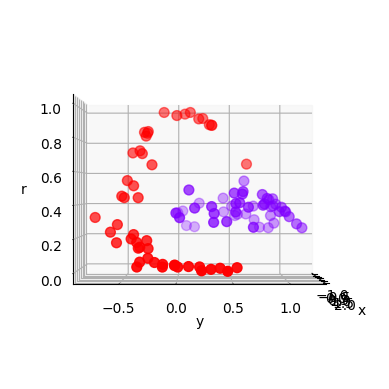

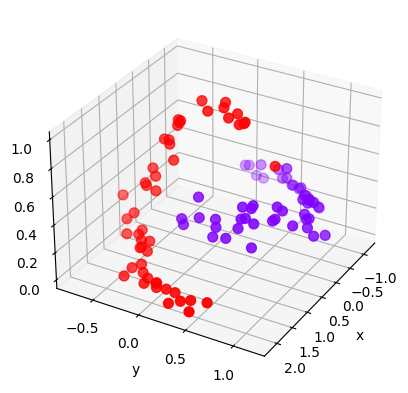

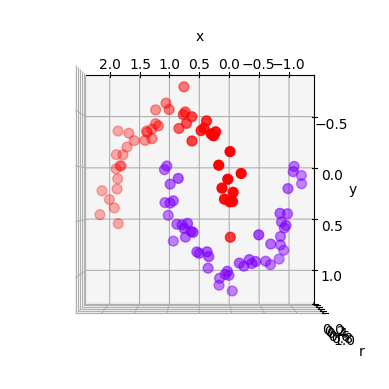

In [13]:
# Extend the data dimensionality
r = np.exp(-(X ** 2).sum(1))

# Call plot_3D function to visualize the data in 3D space
plot_3D(elev=0, azim=0, X=X, y=y, r=r)
plot_3D(elev=30, azim=30, X=X, y=y, r=r)
plot_3D(elev=90, azim=90, X=X, y=y, r=r)

In [14]:
# Create a Pipeline model that combines three steps: polynomial features, standard scaling and linear SVM
model = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, max_iter=5000))
])

# Train the model on the data
model.fit(X, y)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, max_iter=5000))])

In [15]:
# Create SVC models with different kernel functions
svc_model_rbf = SVC(kernel="rbf")  # RBF kernel function
svc_model_rbf.fit(X, y)

svc_model_poly = SVC(kernel="poly", degree=3)  # Polynomial kernel function, set degree to 3
svc_model_poly.fit(X, y)

svc_model_sigmoid = SVC(kernel="sigmoid")  # Sigmoid kernel function
svc_model_sigmoid.fit(X, y)

# Create NuSVC models with different kernel functions
nusvc_model_rbf = NuSVC(kernel="rbf")
nusvc_model_rbf.fit(X, y)

nusvc_model_poly = NuSVC(kernel="poly", degree=3)
nusvc_model_poly.fit(X, y)

nusvc_model_sigmoid = NuSVC(kernel="sigmoid")
nusvc_model_sigmoid.fit(X, y)

NuSVC(kernel='sigmoid')

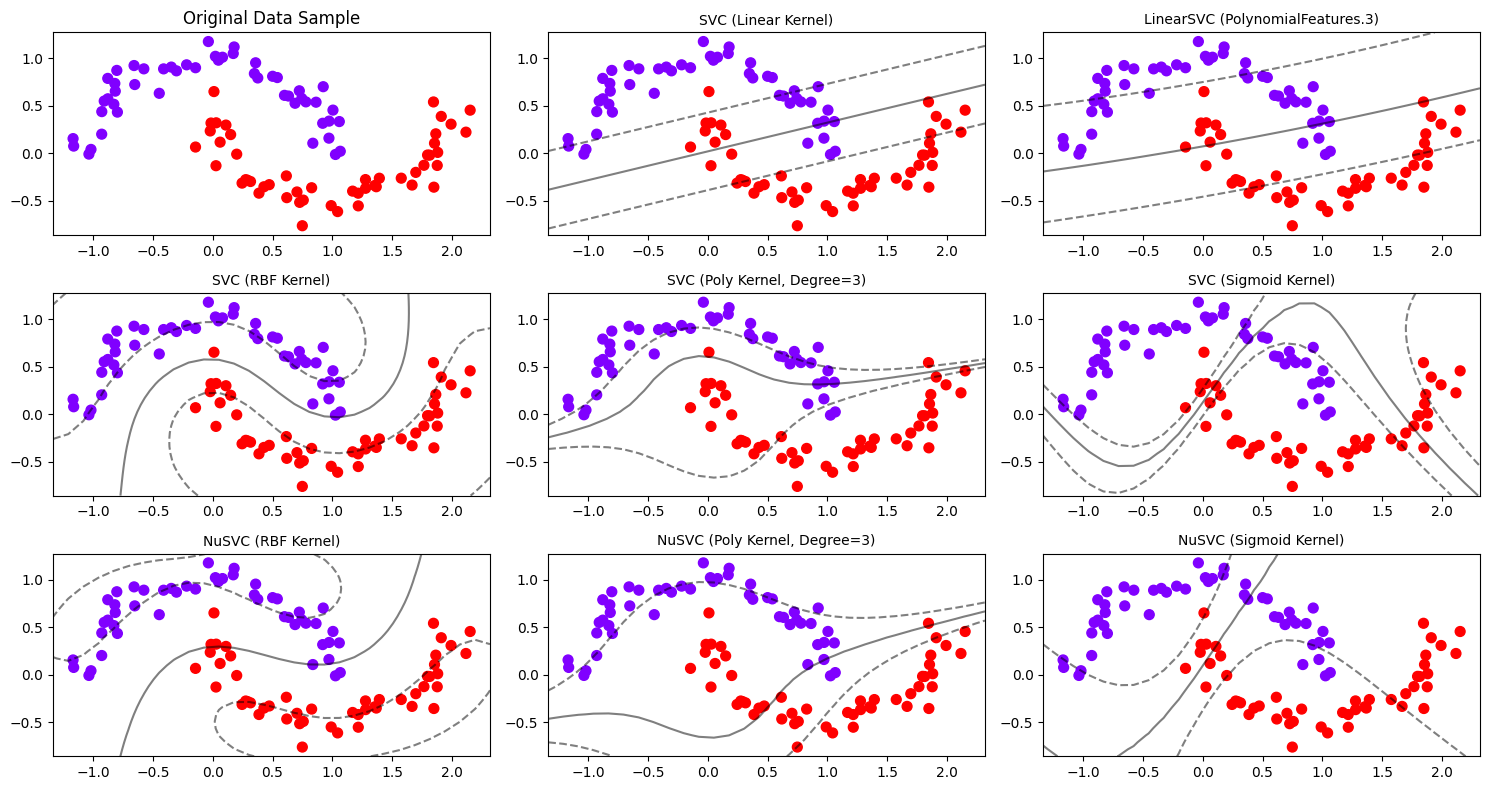

In [16]:
# Create subplots and titles
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
axL = axes.ravel()
titles = ['LinearSVC', 'SVC (rbf)', 'SVC (poly)', 'SVC (sigmoid)', 'NuSVC (rbf)', 'NuSVC (poly)', 'NuSVC (sigmoid)']

# Plot the original data samples
for ax in axL:
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    ax.set_title('Original Data Sample')

# Plot the decision boundary for each model
plot_svc_decision_function(svc_model_linear, axL[1], "SVC (Linear Kernel)")
plot_svc_decision_function(model, axL[2], "LinearSVC (PolynomialFeatures.3)")
plot_svc_decision_function(svc_model_rbf, axL[3], "SVC (RBF Kernel)")
plot_svc_decision_function(svc_model_poly, axL[4], "SVC (Poly Kernel, Degree=3)")
plot_svc_decision_function(svc_model_sigmoid, axL[5], "SVC (Sigmoid Kernel)")
plot_svc_decision_function(nusvc_model_rbf, axL[6], "NuSVC (RBF Kernel)")
plot_svc_decision_function(nusvc_model_poly, axL[7], "NuSVC (Poly Kernel, Degree=3)")
plot_svc_decision_function(nusvc_model_sigmoid, axL[8], "NuSVC (Sigmoid Kernel)")

plt.tight_layout()
plt.show()